In [1]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [2]:
seed = 0 
np.random.seed(seed)
tf.random.set_seed(3)

In [3]:
df_pre = pd.read_csv('data/wine.csv')
df = df_pre.sample(frac=0.5)

In [4]:
dataset = df.values
print(dataset.dtype)


float64


In [5]:
X = dataset[:,:12]
Y = dataset[:,12]

In [6]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
#이진 분류이므로 sigmoid를 쓴다. 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                390       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                372       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 875
Trainable params: 875
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [9]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    #해당 폴더의 존재유무를 체크해준다. 

modelpath = './model/{epoch: 02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verbose=1,
                              save_best_only=True)

early_stopping = EarlyStopping(monitor='val_loss', patience=100)
#early_stopping 객체를 만들고 val_loss를 모니터링 하는데 이는
#val_loss가 더이상 좋아지지 않으면(줄어들지 않으면)
#같거나 더 높게 나온다는것인데, 그 좋아지지 않는 상태를 100번만 참으라는 의미가 된다.
#그래서 더 이상 좋아지지 않으면 자동으로 stop을 시키는것이다. 


Epoch 00001: val_loss improved from inf to 0.69273, saving model to ./model\ 1-0.6927.hdf5

Epoch 00002: val_loss improved from 0.69273 to 0.53185, saving model to ./model\ 2-0.5319.hdf5

Epoch 00003: val_loss improved from 0.53185 to 0.52216, saving model to ./model\ 3-0.5222.hdf5

Epoch 00004: val_loss improved from 0.52216 to 0.40981, saving model to ./model\ 4-0.4098.hdf5

Epoch 00005: val_loss improved from 0.40981 to 0.38069, saving model to ./model\ 5-0.3807.hdf5

Epoch 00006: val_loss improved from 0.38069 to 0.34194, saving model to ./model\ 6-0.3419.hdf5

Epoch 00007: val_loss improved from 0.34194 to 0.31171, saving model to ./model\ 7-0.3117.hdf5

Epoch 00008: val_loss improved from 0.31171 to 0.29385, saving model to ./model\ 8-0.2938.hdf5

Epoch 00009: val_loss improved from 0.29385 to 0.27541, saving model to ./model\ 9-0.2754.hdf5

Epoch 00010: val_loss improved from 0.27541 to 0.26499, saving model to ./model\ 10-0.2650.hdf5

Epoch 00011: val_loss improved from 0.2649

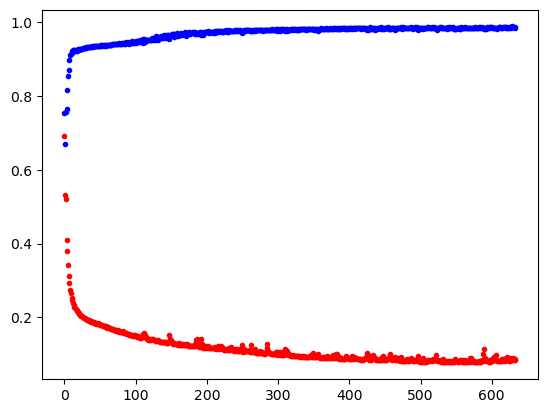

In [10]:
history = model.fit(X,Y, validation_split=0.2 ,epochs = 3500, batch_size=500, 
          verbose=0, callbacks=[checkpointer, early_stopping])
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c = 'red', markersize=3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize=3)
plt.show()

In [ ]:
##그림을 보면 알 수 있듯이 ...
## early stopping을 이용해 overfitting이 일어나기 직전에 딱 멈춰버린것이다.